In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

In [2]:
# **Data Pre-processing**

# Load the dataset
dataset = pd.read_csv("Flight_On_Time_Data.csv")

In [3]:
# Inspect the dataset
print(dataset.head(10))

            Carrier_Name  Year  Quarter Month  Month_Day   Week_Day  \
0  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
1  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
2  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
3  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
4  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
5  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
6  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
7  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
8  United Air Lines Inc.  2023        2   Apr         26  Wednesday   
9  United Air Lines Inc.  2023        2   Apr         26  Wednesday   

  Flight_Date  Airline_DOT_ID Tail_Number  Flight_Number  ...  \
0  2023-04-26           19977      N851UA           1788  ...   
1  2023-04-26           19977      N37530           1787  ...   
2  2023-04-26          

In [4]:
# Check for duplicates and missing values
print(f"Number of duplicates: {dataset.duplicated().sum()}")
print("Missing values per column:\n", dataset.isnull().sum())

Number of duplicates: 0
Missing values per column:
 Carrier_Name                           0
Year                                   0
Quarter                                0
Month                                  0
Month_Day                              0
Week_Day                               0
Flight_Date                            0
Airline_DOT_ID                         0
Tail_Number                            0
Flight_Number                          0
Origin_Airport_ID                      0
Origin_City_Market_ID                  0
Origin_IATA_Code                       0
Origin_City_State                      0
Destination_Airport_ID                 0
Destination_City_Market_ID             0
Destination_IATA_Code                  0
Destination_City_State                 0
Dep_Time_Block_Group                   0
Scheduled_Departure_Time               0
Actual_Dep_Time                        0
Dep_Time_Offset                        0
Dep_Delay_Minutes                      0
Dep_D

In [5]:
# Handle duplicates
dataset = dataset.drop_duplicates()
# Handle missing values (example: drop rows with missing values)
dataset = dataset.dropna()

In [6]:
dataset.head(10)

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,...,93,65.0,1.0,472.0,2.0,39.0,0.0,8.0,0.0,0.0
5,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N18223,1783,...,198,158.0,1.0,925.0,4.0,13.0,0.0,29.0,0.0,0.0
9,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37542,1776,...,157,112.0,1.0,678.0,3.0,17.0,0.0,12.0,0.0,0.0
22,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N828UA,1762,...,172,151.0,1.0,1024.0,5.0,7.0,0.0,0.0,0.0,9.0
27,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N77510,1758,...,175,134.0,1.0,948.0,4.0,0.0,0.0,15.0,0.0,0.0
43,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N17752,1742,...,108,83.0,1.0,534.0,3.0,17.0,0.0,3.0,0.0,0.0
50,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N220UA,1736,...,460,401.0,1.0,3302.0,11.0,0.0,0.0,15.0,0.0,0.0
59,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37263,1727,...,166,146.0,1.0,1222.0,5.0,0.0,0.0,0.0,0.0,68.0
65,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N77867,1721,...,342,302.0,1.0,2367.0,10.0,8.0,0.0,9.0,0.0,0.0
72,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37287,1715,...,127,105.0,1.0,794.0,4.0,1.0,0.0,0.0,0.0,44.0


In [7]:
# Correct dtypes if needed (example: ensure 'Dep_Delay_At_Least_15_Minutes' is a boolean)
dataset['Dep_Delay_At_Least_15_Minutes'] = dataset['Dep_Delay_At_Least_15_Minutes'].astype(bool)
dataset['Arr_Delay_At_Least_15_Minutes'] = dataset['Arr_Delay_At_Least_15_Minutes'].astype(bool)

In [8]:
# Extract features from the existing date components
dataset['is_weekend'] = dataset['Week_Day'].isin(['Saturday', 'Sunday']).astype(int)

In [9]:
dataset.head(10)

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay,is_weekend
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,...,65.0,1.0,472.0,2.0,39.0,0.0,8.0,0.0,0.0,0
5,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N18223,1783,...,158.0,1.0,925.0,4.0,13.0,0.0,29.0,0.0,0.0,0
9,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37542,1776,...,112.0,1.0,678.0,3.0,17.0,0.0,12.0,0.0,0.0,0
22,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N828UA,1762,...,151.0,1.0,1024.0,5.0,7.0,0.0,0.0,0.0,9.0,0
27,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N77510,1758,...,134.0,1.0,948.0,4.0,0.0,0.0,15.0,0.0,0.0,0
43,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N17752,1742,...,83.0,1.0,534.0,3.0,17.0,0.0,3.0,0.0,0.0,0
50,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N220UA,1736,...,401.0,1.0,3302.0,11.0,0.0,0.0,15.0,0.0,0.0,0
59,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37263,1727,...,146.0,1.0,1222.0,5.0,0.0,0.0,0.0,0.0,68.0,0
65,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N77867,1721,...,302.0,1.0,2367.0,10.0,8.0,0.0,9.0,0.0,0.0,0
72,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37287,1715,...,105.0,1.0,794.0,4.0,1.0,0.0,0.0,0.0,44.0,0


In [10]:
selected_columns = ["Carrier_Name","Year", "Month_Day", "Week_Day","Origin_City_State","Destination_City_State","Dep_Delay_At_Least_15_Minutes","Distance_Miles","is_weekend", "Arr_Delay_At_Least_15_Minutes"] 
my_data = dataset[selected_columns]
my_data.head(10)
X = my_data.drop(columns=["Arr_Delay_At_Least_15_Minutes"])
y = my_data["Arr_Delay_At_Least_15_Minutes"]

In [11]:
X.columns

Index(['Carrier_Name', 'Year', 'Month_Day', 'Week_Day', 'Origin_City_State',
       'Destination_City_State', 'Dep_Delay_At_Least_15_Minutes',
       'Distance_Miles', 'is_weekend'],
      dtype='object')

In [12]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'), [0, 3, 4, 5]),  # Encode categorical variables
    ('scaler', StandardScaler(), [1, 2, 7])  # Scale numerical variables
], remainder='passthrough')
try:
    X = ct.fit_transform(X)
    print(X)
except ValueError as e:
    print("ValueError:", e)

  (0, 14)	1.0
  (0, 21)	1.0
  (0, 104)	1.0
  (0, 578)	1.0
  (0, 684)	1.1544378344978812
  (0, 685)	-0.6840945580142723
  (0, 686)	1.0
  (1, 14)	1.0
  (1, 21)	1.0
  (1, 82)	1.0
  (1, 491)	1.0
  (1, 684)	1.1544378344978812
  (1, 685)	0.061869918862893086
  (2, 14)	1.0
  (2, 21)	1.0
  (2, 261)	1.0
  (2, 412)	1.0
  (2, 684)	1.1544378344978812
  (2, 685)	-0.34487009391560547
  (2, 686)	1.0
  (3, 14)	1.0
  (3, 21)	1.0
  (3, 207)	1.0
  (3, 434)	1.0
  (3, 684)	1.1544378344978812
  :	:
  (147393, 684)	-1.5311223413951587
  (147393, 685)	2.5385378509230625
  (147394, 8)	1.0
  (147394, 19)	1.0
  (147394, 206)	1.0
  (147394, 568)	1.0
  (147394, 684)	-1.3073256600707388
  (147394, 685)	2.6142870031004346
  (147394, 686)	1.0
  (147395, 8)	1.0
  (147395, 17)	1.0
  (147395, 239)	1.0
  (147395, 590)	1.0
  (147395, 684)	-1.0835289787463187
  (147395, 685)	2.084042937858829
  (147395, 686)	1.0
  (147395, 687)	1.0
  (147396, 8)	1.0
  (147396, 17)	1.0
  (147396, 262)	1.0
  (147396, 568)	1.0
  (147396, 684)

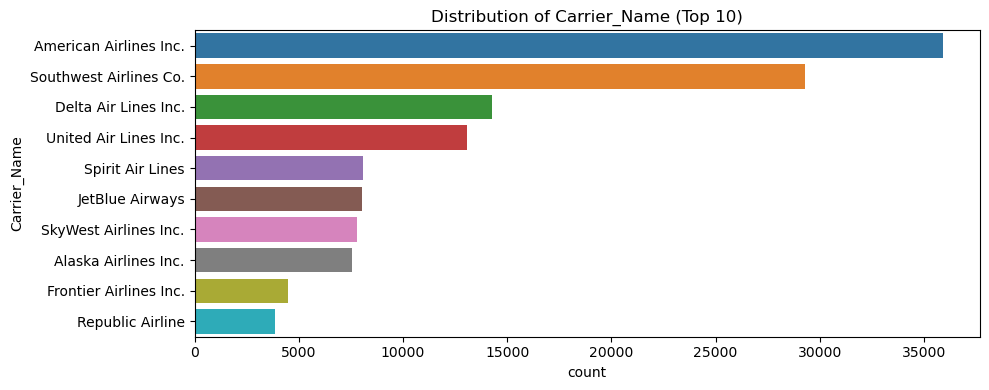

<Figure size 640x480 with 0 Axes>

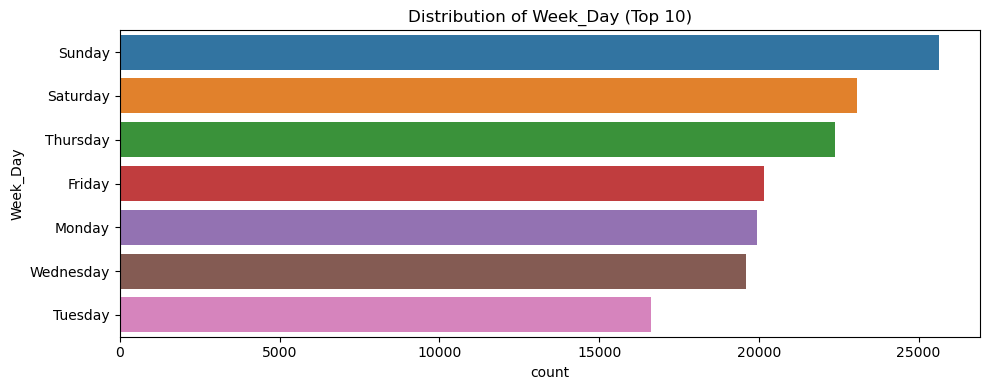

<Figure size 640x480 with 0 Axes>

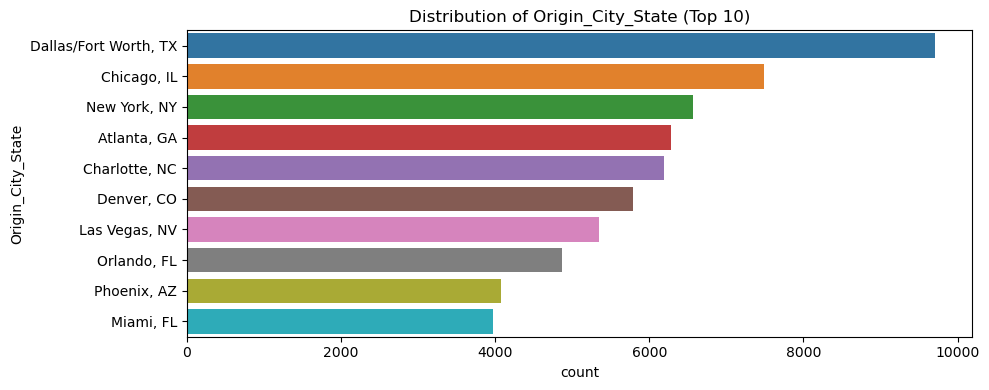

<Figure size 640x480 with 0 Axes>

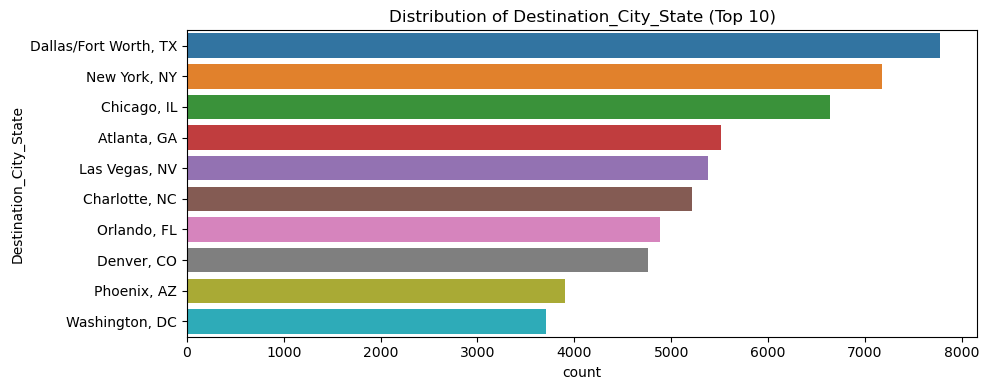

<Figure size 640x480 with 0 Axes>

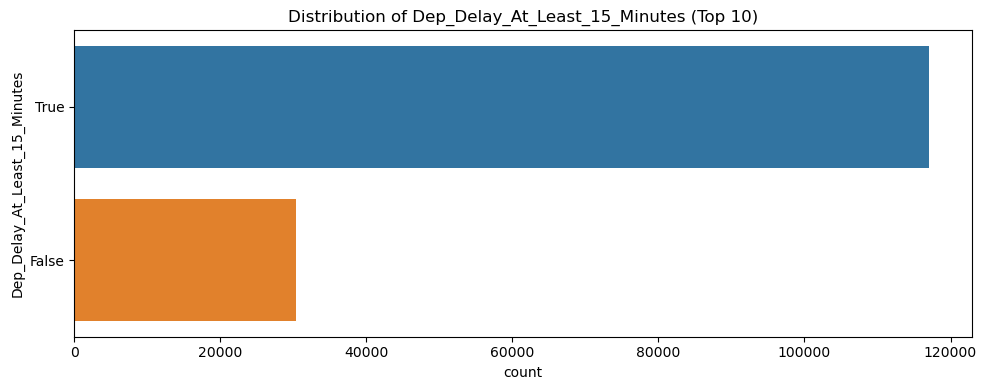

<Figure size 640x480 with 0 Axes>

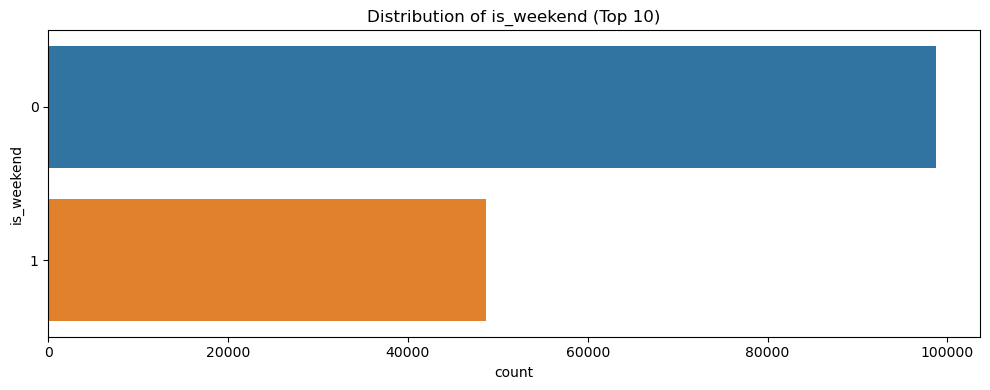

<Figure size 640x480 with 0 Axes>

In [13]:
# **EDA**

# Univariate Analysis
# Categorical variables
categorical_vars = ["Carrier_Name", "Week_Day", "Origin_City_State", "Destination_City_State", "Dep_Delay_At_Least_15_Minutes", "is_weekend"]
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    top_categories = my_data[var].value_counts().index[:10]
    sns.countplot(y=my_data[var], order=top_categories)
    plt.title(f'Distribution of {var} (Top 10)')
    plt.tight_layout()
    plt.show()
    plt.clf()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


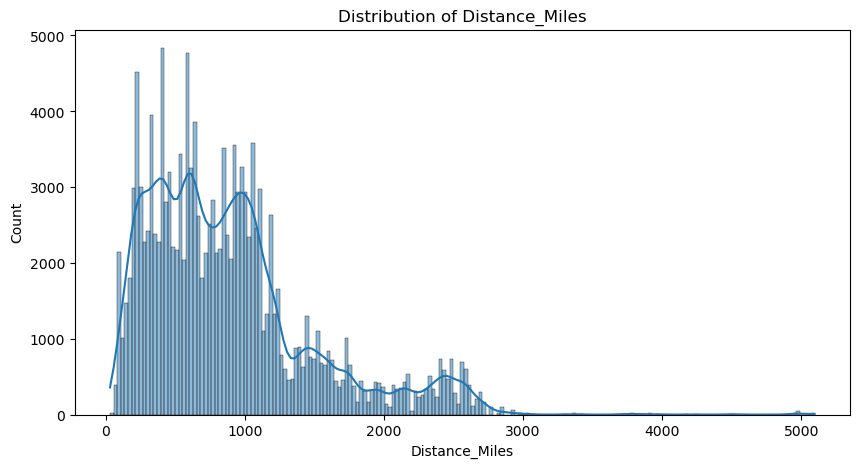

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


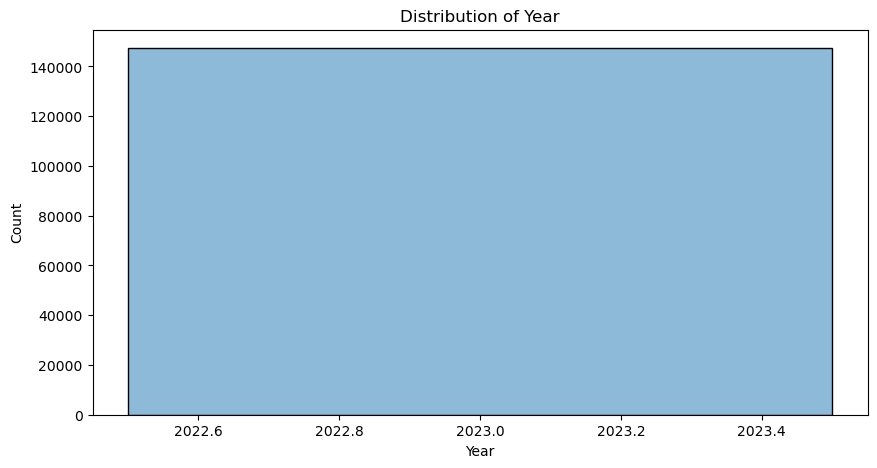

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


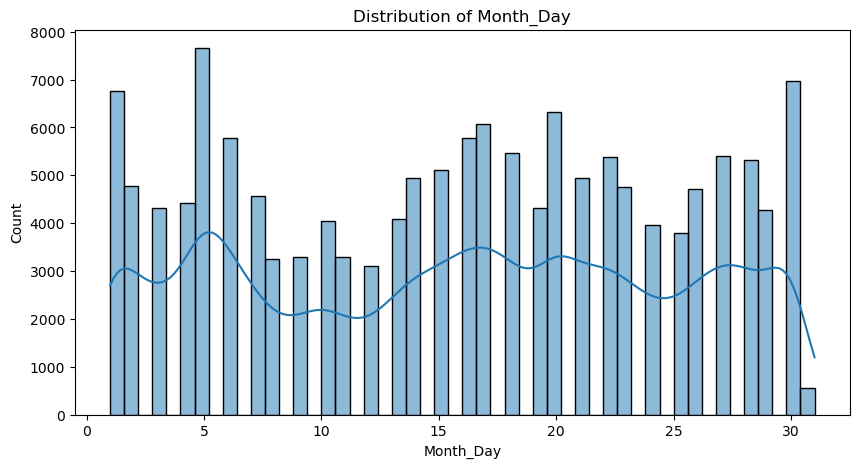

In [14]:

# Univariate Analysis for Numerical Variables
numerical_vars = ["Distance_Miles","Year", "Month_Day"]
for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(my_data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

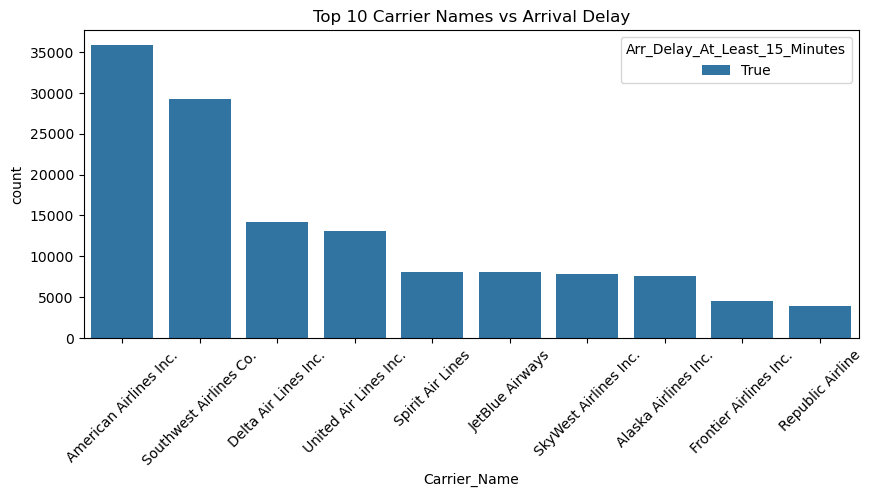

In [39]:
# Bivariate Analysis: Top 10 Carriers
# Limit to top 10 carriers
top_carriers = my_data['Carrier_Name'].value_counts().index[:10]

plt.figure(figsize=(10, 4))  # Adjust figure size if necessary
sns.countplot(x="Carrier_Name", hue="Arr_Delay_At_Least_15_Minutes", data=my_data_top, order=top_carriers)
plt.title('Top 10 Carrier Names vs Arrival Delay')
plt.xticks(rotation=45)  # Rotate labels to 45 degrees
plt.show()

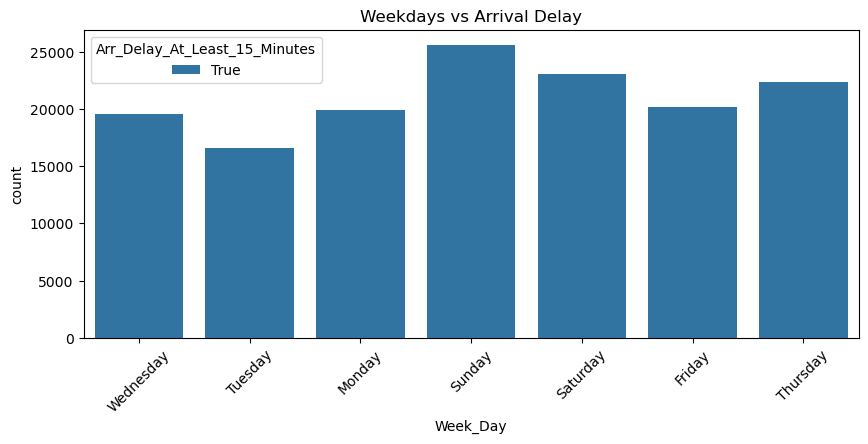

In [25]:

plt.figure(figsize=(10, 4))
sns.countplot(x = "Week_Day", hue = "Arr_Delay_At_Least_15_Minutes", data = my_data)
plt.title('Weekdays vs Arrival Delay')
plt.xticks(rotation = 45) 
plt.show()

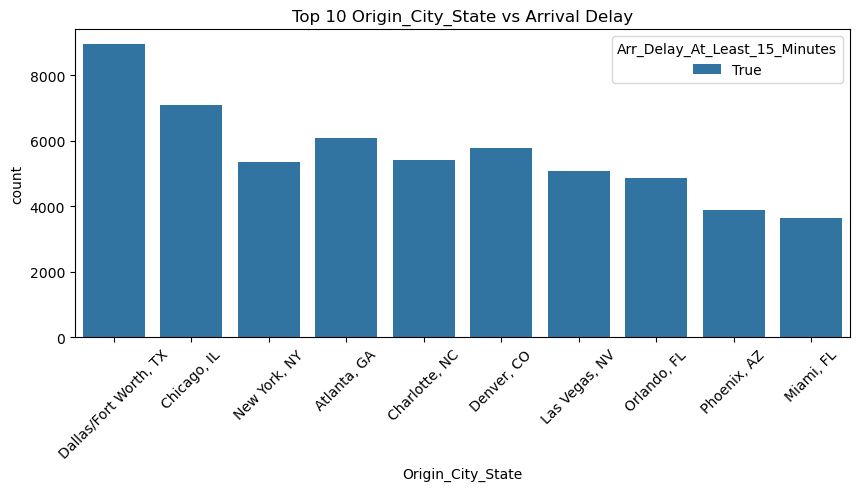

In [38]:
top_carriers = my_data["Origin_City_State"].value_counts().index[:10]

plt.figure(figsize=(10, 4))  # Adjust figure size if necessary
sns.countplot(x="Origin_City_State", hue="Arr_Delay_At_Least_15_Minutes", data=my_data_top, order=top_carriers)
plt.title('Top 10 Origin_City_State vs Arrival Delay')
plt.xticks(rotation=45)  # Rotate labels to 45 degrees
plt.show()

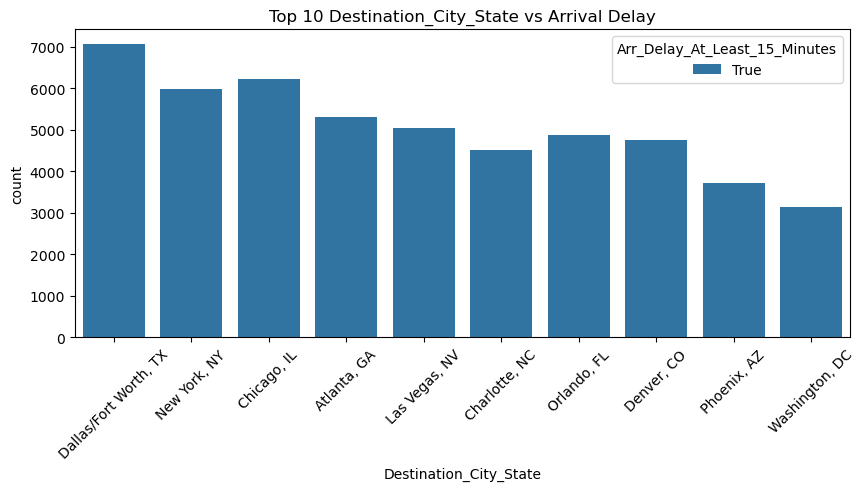

In [36]:
top_carriers = my_data["Destination_City_State"].value_counts().index[:10]

plt.figure(figsize=(10, 4))  
sns.countplot(x = "Destination_City_State", hue = "Arr_Delay_At_Least_15_Minutes", data = my_data_top, order = top_carriers)
plt.title('Top 10 Destination_City_State vs Arrival Delay')
plt.xticks(rotation=45) 
plt.show()

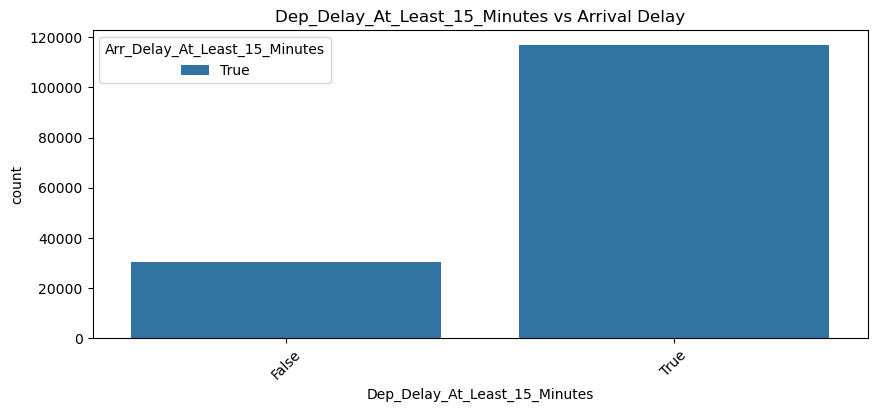

In [37]:
plt.figure(figsize=(10, 4))  
sns.countplot(x = "Dep_Delay_At_Least_15_Minutes", hue = "Arr_Delay_At_Least_15_Minutes", data = my_data)
plt.title('Dep_Delay_At_Least_15_Minutes vs Arrival Delay')
plt.xticks(rotation=45) 
plt.show()

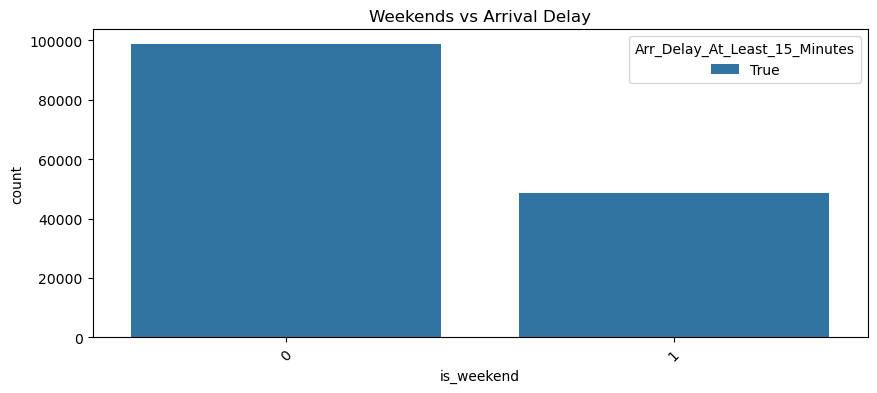

In [34]:
plt.figure(figsize=(10, 4)) 
sns.countplot(x = "is_weekend", hue = "Arr_Delay_At_Least_15_Minutes", data = my_data)
plt.title('Weekends vs Arrival Delay')
plt.xticks(rotation=45)  
plt.show()